[[15  3  3]
 [ 3 10  2]
 [ 0  5 20]]
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        21
           1       0.56      0.67      0.61        15
           2       0.80      0.80      0.80        25

    accuracy                           0.74        61
   macro avg       0.73      0.73      0.73        61
weighted avg       0.75      0.74      0.74        61

output: [2 0 1 1 2 1 1 1 1 2 0 1 2 1 0 2 2 1 2 0 1 0 0 2 1 2 0 2 0 0 1 1 2 0 2 1 2
 0 0 1 2 2 2 1 2 2 0 2 0 2 2 2 2 1 2 0 0 0 1 2 0]
test accuracy: 0.7377049180327869


Text(0.5, 1.0, 'Confusion matrix of linear SVM')

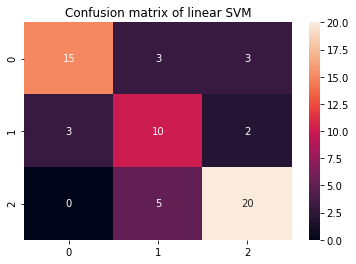

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import preprocessing
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

def convert(data):
    number = preprocessing.LabelEncoder()
    data['age'] = number.fit_transform(data.age)
    data['gender'] = number.fit_transform(data.gender)
    data['type'] = number.fit_transform(data.type)
    data['gradeVA'] = number.fit_transform(data.gradeVA)
    data['RAPD'] = number.fit_transform(data.RAPD)
    data['zone'] = number.fit_transform(data.zone)
    data['traumaticcataract'] = number.fit_transform(data.traumaticcataract)
    data['TON'] = number.fit_transform(data.TON)
    data['FB'] = number.fit_transform(data.FB)
    data['RD'] = number.fit_transform(data.RD)
    data['Endophthalmitis'] = number.fit_transform(data.Endophthalmitis)
    data['OTStotalscore'] = number.fit_transform(data.OTStotalscore)      
    data['lastFUBGrade'] = number.fit_transform(data.lastFUBGrade)      
    data=data.fillna(-999)
    return data

ogidata = pd.read_csv("ogithreeCat.csv")

ogidata = convert(ogidata)
ogidata.fillna(0,inplace=True)  
ogidata.head()
ogidata.describe()
temp = ogidata.drop('lastFUBGrade', axis=1)
y = ogidata['lastFUBGrade']
X  = (temp-np.min(temp))/(np.max(temp)-np.min(temp))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print ("output:", y_pred)
print("test accuracy:",svm.score(X_test,y_test))


cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of linear SVM') # fmt='d' formats the numbers as digits, which means integers




In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import preprocessing
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

def convert(data):
    number = preprocessing.LabelEncoder()
    data['age'] = number.fit_transform(data.age)
    data['gender'] = number.fit_transform(data.gender)
    data['type'] = number.fit_transform(data.type)
    data['gradeVA'] = number.fit_transform(data.gradeVA)
    data['RAPD'] = number.fit_transform(data.RAPD)
    data['zone'] = number.fit_transform(data.zone)
    data['traumaticcataract'] = number.fit_transform(data.traumaticcataract)
    data['TON'] = number.fit_transform(data.TON)
    data['FB'] = number.fit_transform(data.FB)
    data['RD'] = number.fit_transform(data.RD)
    data['Endophthalmitis'] = number.fit_transform(data.Endophthalmitis)
    data['lastFUBCAVA'] = number.fit_transform(data.lastFUBCAVA)
    data['OTStotalscore'] = number.fit_transform(data.OTStotalscore)
    data['FinalVisualBySVM'] = number.fit_transform(data.OTStotalscore)    
    data=data.fillna(-999)
    return data

ogidata = pd.read_csv("ogi.csv")
ogidata = convert(ogidata)

ogidata.describe()


,age,gender,type,gradeVA,RAPD,zone,traumaticcataract,TON,FB,RD,Endophthalmitis,lastFUBCAVA,OTStotalscore,FinalVisualBySVM,FinalVisualByRF
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.0
mean,23.126246,0.803987,1.611296,2.913621,0.335548,0.541528,0.431894,0.083056,0.156146,0.112957,0.029900,8.617940,1.970100,1.970100,0.0
std,15.952346,0.397640,0.777864,1.221685,0.472968,0.713515,0.496165,0.276427,0.398586,0.317067,0.170596,4.739572,1.217553,1.217553,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,8.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,1.000000,0.0
50%,23.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,0.0
75%,34.000000,1.000000,2.000000,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,14.000000,3.000000,3.000000,0.0
max,60.000000,1.000000,3.000000,6.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,15.000000,4.000000,4.000000,0.0


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import preprocessing
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

def convert(data):
    number = preprocessing.LabelEncoder()
    data['age'] = number.fit_transform(data.age)
    data['gender'] = number.fit_transform(data.gender)
    data['type'] = number.fit_transform(data.type)
    data['gradeVA'] = number.fit_transform(data.gradeVA)
    data['RAPD'] = number.fit_transform(data.RAPD)
    data['zone'] = number.fit_transform(data.zone)
    data['traumaticcataract'] = number.fit_transform(data.traumaticcataract)
    data['TON'] = number.fit_transform(data.TON)
    data['FB'] = number.fit_transform(data.FB)
    data['RD'] = number.fit_transform(data.RD)
    data['Endophthalmitis'] = number.fit_transform(data.Endophthalmitis)
    data['OTStotalscore'] = number.fit_transform(data.OTStotalscore)      
    data['lastFUBGrade'] = number.fit_transform(data.lastFUBGrade)      
    data=data.fillna(-999)
    return data

ogidata = pd.read_csv("ogithreeCat.csv")

ogidata = convert(ogidata)
ogidata.fillna(0,inplace=True)  
ogidata.head()
ogidata.describe()
temp = ogidata.drop('lastFUBGrade', axis=1)
y = ogidata['lastFUBGrade']
X  = (temp-np.min(temp))/(np.max(temp)-np.min(temp))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


kf = KFold(n_splits=10, random_state=42, shuffle=True)

model = SVC(kernel='linear')
for train_index, test_index in kf.split(X):
   #split the data
   X_train, X_test = X.iloc[train_index], X.iloc[test_index]
   y_train, y_test = y.iloc[train_index], y.iloc[test_index]
   #fit the model
   model.fit(X_train, y_train)
   #make predictions
   predictions = model.predict(X_test)
   #calculate accuracy
   accuracy = model.score(X_test, y_test)
   print('Accuracy:', accuracy)
    
print ("output:", y_pred) 
print("test accuracy:",model.score(X_test,y_test))



Accuracy: 0.6129032258064516
Accuracy: 0.7666666666666667
Accuracy: 0.6
Accuracy: 0.6
Accuracy: 0.6
Accuracy: 0.7
Accuracy: 0.6666666666666666
Accuracy: 0.7
Accuracy: 0.8
Accuracy: 0.7333333333333333
output: [2 0 1 1 2 1 1 1 1 2 0 1 2 1 0 2 2 1 2 0 1 0 0 2 1 2 0 2 0 0 1 1 2 0 2 1 2
 0 0 1 2 2 2 1 2 2 0 2 0 2 2 2 2 1 2 0 0 0 1 2 0]
test accuracy: 0.7333333333333333
